In [1]:
import numpy as np
import pandas as pd

In [2]:
traffic_data = pd.read_csv("../data/input/Metro_Interstate_Traffic_Volume.csv")

In [3]:
print(traffic_data.info())
print(traffic_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None
               temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.

In [4]:
traffic_data['date_time'] = pd.to_datetime(traffic_data['date_time'], errors='coerce')

In [5]:
# prepare data for machine learning:
    
if 'holiday' in traffic_data.columns:
    traffic_data['is_holiday'] = traffic_data['holiday'].apply(lambda x: 0 if pd.isna(x) else 1)


if 'temp' in traffic_data.columns:
    traffic_data['temp'] = traffic_data['temp'].replace(0, pd.NA)
    traffic_data['temp_C'] = traffic_data['temp'] - 273.15
    traffic_data['temp_C'] = traffic_data['temp_C'].fillna(traffic_data['temp_C'].mean()).astype(float)


if 'rain_1h' in traffic_data.columns:
    traffic_data = traffic_data.loc[traffic_data['rain_1h'] < 500]


if 'date_time' in traffic_data.columns:
    traffic_data.loc[:, 'date_time'] = pd.to_datetime(traffic_data['date_time'])
    traffic_data.loc[:, 'hour'] = traffic_data['date_time'].dt.hour
    traffic_data.loc[:, 'dayofweek'] = traffic_data['date_time'].dt.dayofweek
    traffic_data.loc[:, 'month'] = traffic_data['date_time'].dt.month
    traffic_data.loc[:, 'year'] = traffic_data['date_time'].dt.year


cols_to_drop = ['holiday', 'temp', 'weather_description', 'date_time']
existing_cols_to_drop = [col for col in cols_to_drop if col in traffic_data.columns]
traffic_data = traffic_data.drop(columns=existing_cols_to_drop)


traffic_data_linear = pd.get_dummies(traffic_data, columns=['weather_main'], drop_first=True)
traffic_data_nonlinear = pd.get_dummies(traffic_data, columns=['weather_main'], drop_first=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8324\3164274542.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  traffic_data['temp_C'] = traffic_data['temp_C'].fillna(traffic_data['temp_C'].mean()).astype(float)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Linear Regression Model

y = traffic_data_linear['traffic_volume']

X = traffic_data_linear.drop(columns=['traffic_volume'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 3309912.185415621
R2 Score: 0.15882647916795678


### Linear Regression

- **Mean Squared Error (MSE):** 3,309,912.19  
- **R² Score:** 0.16  

❌ **Conclusion:**  
The Linear Regression model performed very poorly. It failed to capture the nonlinear and complex patterns in the traffic data and explained only about 16% of the variance. Therefore, it is not suitable for traffic prediction.

In [8]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

randomforestmodel = RandomForestRegressor(n_estimators=100, random_state= 42)
randomforestmodel.fit(X_train, y_train)

y_pred =randomforestmodel.predict(X_test)

mse_randomforest= mean_squared_error(y_test, y_pred)
r2_randomforest= r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_randomforest}")
print(f"R2 Score: {r2_randomforest}")

Mean Squared Error: 169576.64075012016
R2 Score: 0.9569041799419408


### Random Forest 

- **Mean Squared Error (MSE):** 169,576.64  
- **R² Score:** 0.957  

✅ **Conclusion:**  
The Random Forest model performed well, capturing most of the variance in the traffic data (about 96%). 

In [9]:
# XGB Regression

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb_model= XGBRegressor(
    n_estimators= 100,
    learning_rate= 0.1,
    max_depth= 5,
    random_state= 42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb= xgb_model.predict(X_test)

mse_xgb= mean_squared_error(y_test, y_pred_xgb)
r2_xgb= r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error: {mse_xgb}")
print(f"R2 Score: {r2_xgb}")

Mean Squared Error: 182417.296875
R2 Score: 0.953640878200531


### XGBoost (initial)

- **Mean Squared Error (MSE):** 182,417.30  
- **R² Score:** 0.954  

✅ **Conclusion:**  
The initial XGBoost model performed well, explaining about 95% of the variance in the traffic data. It shows strong predictive capability for traffic volume even without additional feature engineering.

C:\Users\Admin\AppData\Local\Temp\ipykernel_8324\1233790606.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = importance_df, x='Importance', y='Feature', palette='viridis', ax=ax)


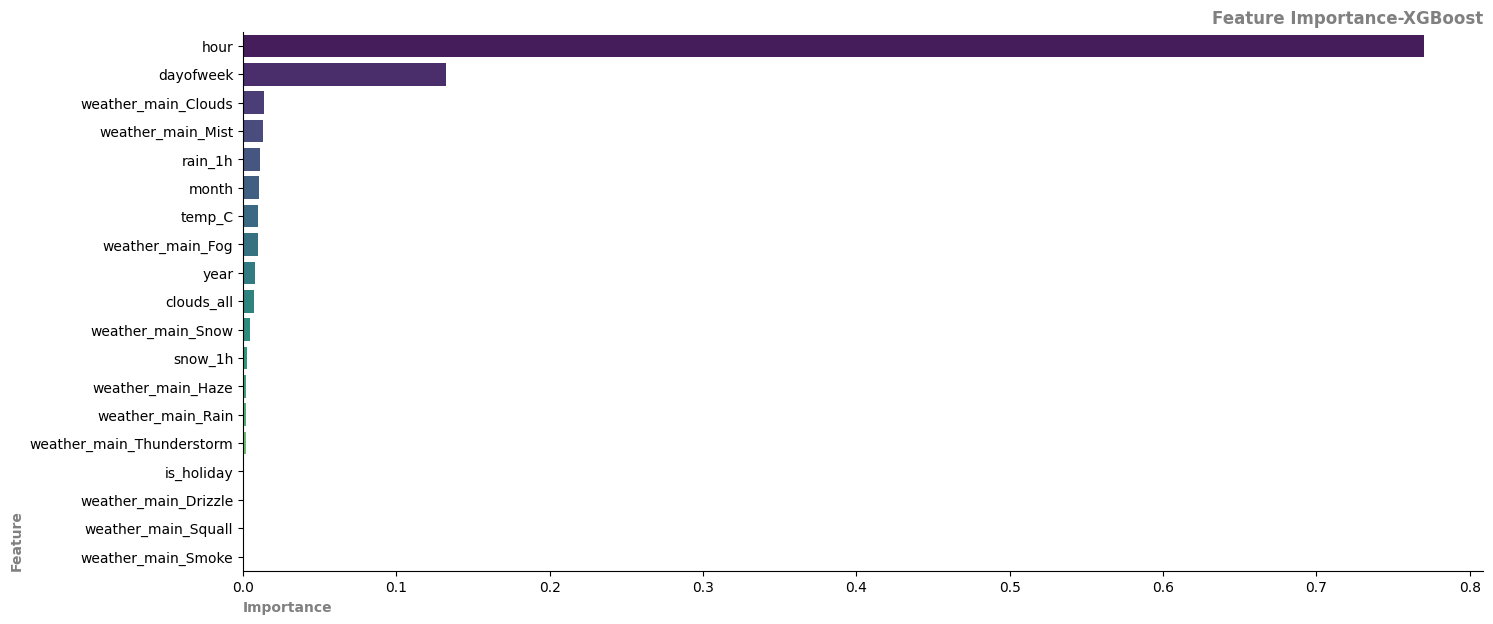

In [10]:
# Feature Importance

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

importance= pd.Series(xgb_model.feature_importances_, index= X_train.columns)
importance= importance.sort_values(ascending=True)

importance_df = pd.DataFrame({
    'Feature': importance.index,
    'Importance': importance.values
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

fig, ax = plt.subplots(figsize = (16,7))
sns.barplot(data = importance_df, x='Importance', y='Feature', palette='viridis', ax=ax)

ax.set_title("Feature Importance-XGBoost", loc = 'right', weight = 'bold', color='gray')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel("Importance", loc='left', weight='bold', color='gray')
ax.set_ylabel("Feature", loc='bottom', weight='bold', color='gray')
plt.savefig("../figures/Feature Importance-XGBoost", dpi=300)
plt.show()

In [11]:
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
})

importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

importance_df

,Feature,Importance
0,hour,0.770186
1,dayofweek,0.132093
2,weather_main_Clouds,0.013706
3,weather_main_Mist,0.012838
4,rain_1h,0.010851
5,month,0.010689
6,temp_C,0.009901
7,weather_main_Fog,0.009704
8,year,0.007766
9,clouds_all,0.007466


                      Feature    Importance
0                        hour  8.257044e-01
1                   dayofweek  1.103959e-01
2                      temp_C  3.014344e-02
3                       month  1.038465e-02
4                        year  8.736778e-03
5                  clouds_all  6.129640e-03
6                     rain_1h  2.623628e-03
7         weather_main_Clouds  1.784447e-03
8           weather_main_Mist  9.603501e-04
9           weather_main_Snow  7.972756e-04
10           weather_main_Fog  6.442687e-04
11          weather_main_Rain  5.538935e-04
12          weather_main_Haze  5.500000e-04
13  weather_main_Thunderstorm  2.574350e-04
14                    snow_1h  1.648017e-04
15       weather_main_Drizzle  1.455031e-04
16                 is_holiday  2.249476e-05
17         weather_main_Smoke  8.019005e-07
18        weather_main_Squall  3.584314e-07


C:\Users\Admin\AppData\Local\Temp\ipykernel_8324\2844326842.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = importance_df2, x='Importance', y='Feature', palette='viridis', ax=ax)


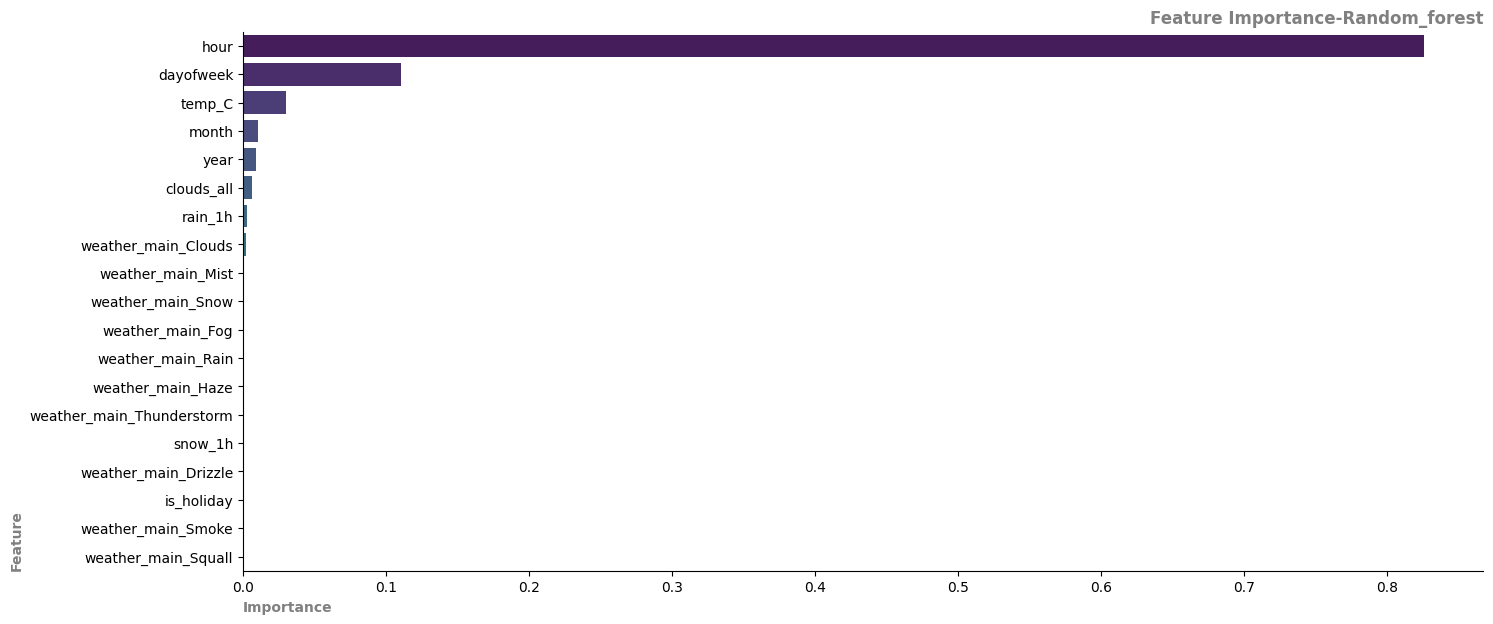

In [12]:
importance_df2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': randomforestmodel.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df2)

fig, ax = plt.subplots(figsize = (16,7))
sns.barplot(data = importance_df2, x='Importance', y='Feature', palette='viridis', ax=ax)

ax.set_title("Feature Importance-Random_forest", loc = 'right', weight = 'bold', color='gray')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel("Importance", loc='left', weight='bold', color='gray')
ax.set_ylabel("Feature", loc='bottom', weight='bold', color='gray')
plt.savefig("../figures/Feature Importance-Random_forest", dpi=300)
plt.show()

XGBoost MSE: 92218.75
XGBoost R2: 0.976580798625946


C:\Users\Admin\AppData\Local\Temp\ipykernel_8324\1279431087.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = importance_xgb, x='Importance', y='Feature', palette='viridis', ax=ax)


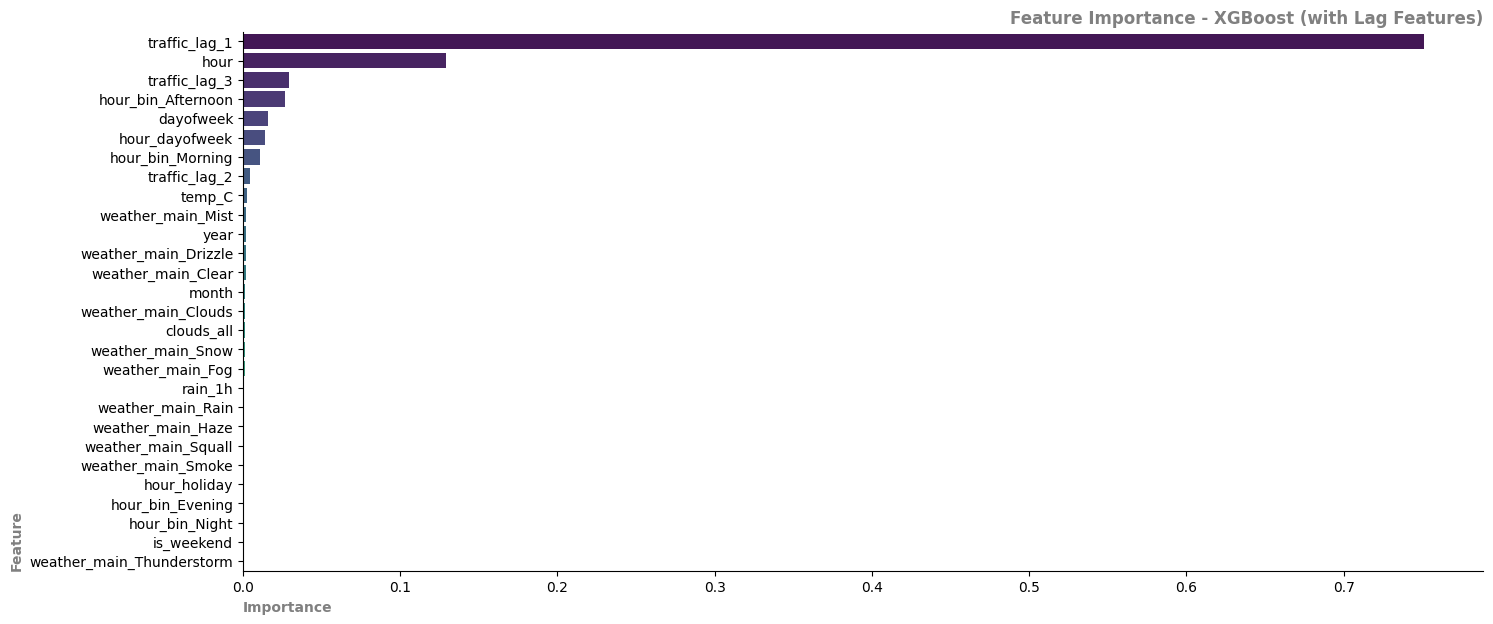

Random Forest MSE: 72068.25281673238
Random Forest R2: 0.981698082100655


C:\Users\Admin\AppData\Local\Temp\ipykernel_8324\1279431087.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = importance_rf, x='Importance', y='Feature', palette='viridis', ax=ax)


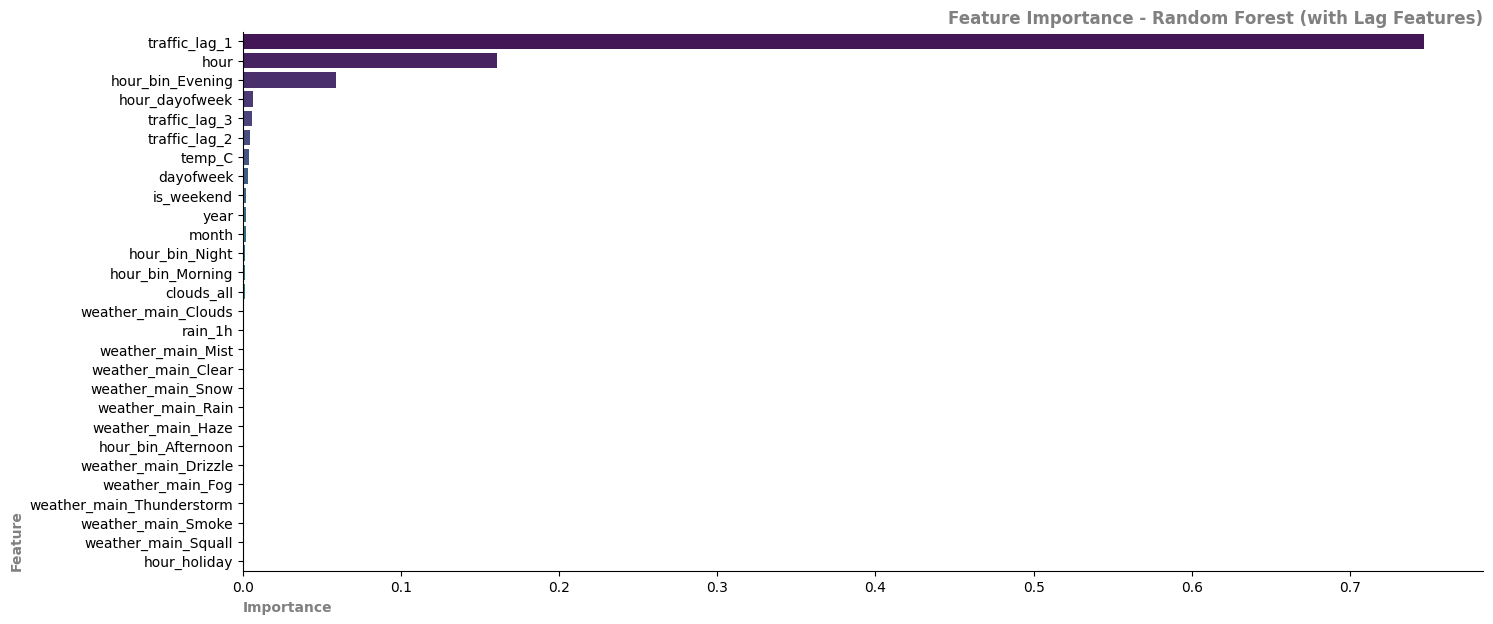

In [ ]:
for lag in [1,2,3]:
    traffic_data[f'traffic_lag_{lag}'] = traffic_data['traffic_volume'].shift(lag)

# ---------- Time Features ----------
traffic_data['hour_bin'] = pd.cut(
    traffic_data['hour'],
    bins=[-1,6,12,18,24],
    labels=['Night','Morning','Afternoon','Evening']
)
traffic_data['is_weekend'] = (traffic_data['dayofweek'] >=5).astype(int)

# ---------- Interaction Features ----------
traffic_data['hour_holiday'] = traffic_data['hour'] * traffic_data['is_holiday']
traffic_data['hour_dayofweek'] = traffic_data['hour'] * traffic_data['dayofweek']

# ---------- Drop NaN rows from lag features ----------
traffic_data = traffic_data.dropna(subset=['traffic_lag_1','traffic_lag_2','traffic_lag_3'])

# ---------- One-hot Encoding ----------
dummy_columns = ['hour_bin']
if 'weather_main' in traffic_data.columns:
    dummy_columns.append('weather_main')

traffic_data = pd.get_dummies(traffic_data, columns=dummy_columns, drop_first=False)

# ---------- Features ----------
feature_cols = [
    'hour','dayofweek','month','year','temp_C','rain_1h','clouds_all',
    'hour_holiday','hour_dayofweek','is_weekend',
    'traffic_lag_1','traffic_lag_2','traffic_lag_3'
]


feature_cols += [c for c in traffic_data.columns if 'weather_main' in c or 'hour_bin' in c]

X = traffic_data[feature_cols]
y = traffic_data['traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- XGBoost ----------
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost R2:", r2_score(y_test, y_pred_xgb))

importance_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

fig, ax = plt.subplots(figsize = (16,7))
sns.barplot(data = importance_xgb, x='Importance', y='Feature', palette='viridis', ax=ax)

ax.set_title("Feature Importance - XGBoost (with Lag Features)", loc = 'right', weight = 'bold', color='gray')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel("Importance", loc='left', weight='bold', color='gray')
ax.set_ylabel("Feature", loc='bottom', weight='bold', color='gray')
plt.savefig("../figures/Feature Importance - XGBoost (with Lag Features)", dpi=300)
plt.show()

# ---------- Random Forest ----------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

fig, ax = plt.subplots(figsize = (16,7))
sns.barplot(data = importance_rf, x='Importance', y='Feature', palette='viridis', ax=ax)

ax.set_title("Feature Importance - Random Forest (with Lag Features)", loc = 'right', weight = 'bold', color='gray')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel("Importance", loc='left', weight='bold', color='gray')
ax.set_ylabel("Feature", loc='bottom', weight='bold', color='gray')
plt.savefig("../figures/Feature Importance - Random Forest (with Lag Features)", dpi=300)
plt.show()


### Random Forest (after adding lag features)

- **Mean Squared Error (MSE):** 72,068.25  
- **R² Score:** 0.982  

✅ **Conclusion:**  
After incorporating lag features, the Random Forest model achieved excellent performance. It explains about 98.2% of the variance in the traffic data, and the prediction error decreased substantially.  
This indicates that including previous traffic values allows the model to capture short-term temporal dependencies, improving predictive accuracy.

---

### XGBoost (after adding lag features)

- **Mean Squared Error (MSE):** 92,218.75  
- **R² Score:** 0.977  

✅ **Conclusion:**  
With lag features included, the XGBoost model also improved significantly, explaining about 97.7% of the variance in the traffic data. The decrease in prediction error demonstrates that temporal information from previous traffic values helps the model better understand short-term patterns in traffic flow.

In [14]:
importance_xgb = importance_xgb.rename(columns={'Importance':'XGBoost_Importance'})
importance_rf = importance_rf.rename(columns={'Importance':'RF_Importance'})

feature_comparison = pd.merge(
    importance_xgb,
    importance_rf,
    on='Feature',
    how='outer'
).fillna(0)

feature_comparison = feature_comparison.sort_values(by='RF_Importance', ascending=False).reset_index(drop=True)


pd.set_option('display.max_rows', None)
feature_comparison

,Feature,XGBoost_Importance,RF_Importance
0,traffic_lag_1,0.751117,7.468832e-01
1,hour,0.129024,1.604223e-01
2,hour_bin_Evening,0.000000,5.865520e-02
3,hour_dayofweek,0.014084,6.150006e-03
4,traffic_lag_3,0.029453,5.527424e-03
5,traffic_lag_2,0.004161,4.140610e-03
6,temp_C,0.002548,3.955057e-03
7,dayofweek,0.015893,3.442544e-03
8,is_weekend,0.000000,2.165065e-03
9,year,0.001881,1.747632e-03


In [15]:
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb  = xgb_model.predict(X_test)

print("XGBoost Train MSE:", mean_squared_error(y_train, y_train_pred_xgb))
print("XGBoost Train R2 :", r2_score(y_train, y_train_pred_xgb))
print("XGBoost Test MSE :", mean_squared_error(y_test, y_test_pred_xgb))
print("XGBoost Test R2  :", r2_score(y_test, y_test_pred_xgb))
print("-"*50)

# ---------- Random Forest ----------
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf  = rf_model.predict(X_test)

print("Random Forest Train MSE:", mean_squared_error(y_train, y_train_pred_rf))
print("Random Forest Train R2 :", r2_score(y_train, y_train_pred_rf))
print("Random Forest Test MSE :", mean_squared_error(y_test, y_test_pred_rf))
print("Random Forest Test R2  :", r2_score(y_test, y_test_pred_rf))

XGBoost Train MSE: 83200.09375
XGBoost Train R2 : 0.9789364337921143
XGBoost Test MSE : 92218.75
XGBoost Test R2  : 0.976580798625946
--------------------------------------------------
Random Forest Train MSE: 10678.490073890041
Random Forest Train R2 : 0.9972965528394202
Random Forest Test MSE : 72068.25281673238
Random Forest Test R2  : 0.981698082100655


 **XGBoost**: Generalizes very well (Train and Test scores are very close → no overfitting).  
- **Random Forest**: Very high Train R² (0.997) compared to Test R² (0.982) → slight overfitting, but Test performance is still excellent.  
- Overall, **both models perform strongly**, with XGBoost showing more balanced generalization.